In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

In [7]:


plays = pd.read_csv('nfl-big-data-bowl-2023/plays.csv')
games = pd.read_csv('nfl-big-data-bowl-2023/games.csv')

p_data =  pd.read_csv("all_weeks_processed_final.csv")

In [11]:
processed_data = p_data
data = processed_data

In [12]:
data = data[['gameId','playId','frameId','frame_from_snap','ball_thrown_frame']].groupby(['gameId','playId']).agg({'frame_from_snap': ['max'],'frameId': ['max'],'ball_thrown_frame': ['min'] }).reset_index()
data.columns = [ '_'.join(x) for x in data.columns ]
data



,gameId_,playId_,frame_from_snap_max,frameId_max,ball_thrown_frame_min
0,2021090900,97,23,43,33
1,2021090900,137,7,37,27
2,2021090900,187,14,31,21
3,2021090900,282,14,43,33
4,2021090900,349,16,37,27
...,...,...,...,...,...
8552,2021110100,4310,28,60,100
8553,2021110100,4363,35,48,38
8554,2021110100,4392,21,53,100
8555,2021110100,4411,38,37,27


In [14]:
mean = np.mean(data['ball_thrown_frame_min'])
mean

38.289587472244946

In [15]:
def score(last_good_pocket,ball_thrown, frameId):
    scores = []
    for i in range(len(last_good_pocket)):
        #take in account a quick play vs long play
        if(last_good_pocket[i] > ball_thrown[i]):
        
            scores.append(100 * max(1,(last_good_pocket[i]/mean)**2))
        else:
            scores.append(100 * (last_good_pocket[i] / ball_thrown[i]))
    return scores



In [16]:
data['score']= score(data['frame_from_snap_max'],data['ball_thrown_frame_min'],data['frameId_max'])
#data['score1']= score1(data['frame_from_snap_max'],data['ball_thrown_frame_min'])

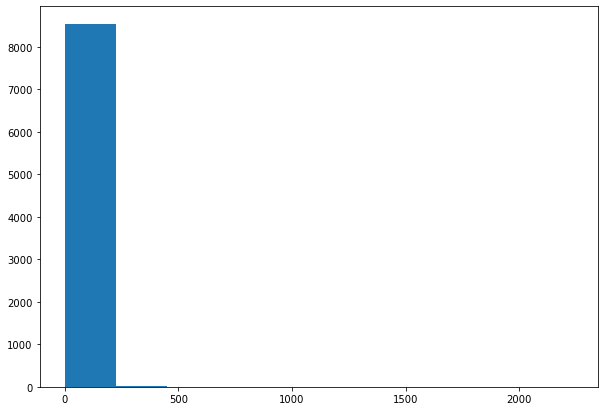

In [17]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist((data['score']))
 
# Show plot
plt.show()

In [18]:
data = data.rename(columns={"gameId_": "gameId", "playId_": "playId"})
data


,gameId,playId,frame_from_snap_max,frameId_max,ball_thrown_frame_min,score
0,2021090900,97,23,43,33,69.696970
1,2021090900,137,7,37,27,25.925926
2,2021090900,187,14,31,21,66.666667
3,2021090900,282,14,43,33,42.424242
4,2021090900,349,16,37,27,59.259259
...,...,...,...,...,...,...
8552,2021110100,4310,28,60,100,28.000000
8553,2021110100,4363,35,48,38,92.105263
8554,2021110100,4392,21,53,100,21.000000
8555,2021110100,4411,38,37,27,100.000000


In [19]:

final = data.merge(plays,on=['gameId','playId'], how='inner').merge(games[['gameId','week']], on=['gameId'])
final

,gameId,playId,frame_from_snap_max,frameId_max,ball_thrown_frame_min,score,playDescription,quarter,down,yardsToGo,...,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType,week
0,2021090900,97,23,43,33,69.696970,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,...,43.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man,1
1,2021090900,137,7,37,27,25.925926,(13:18) (Shotgun) D.Prescott pass deep left to...,1,1,10,...,108.0,EMPTY,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 4 LB, 3 DB",TRADITIONAL,0,Cover-3,Zone,1
2,2021090900,187,14,31,21,66.666667,(12:23) (Shotgun) D.Prescott pass short middle...,1,2,6,...,76.0,SHOTGUN,"0 RB, 2 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,0,Cover-3,Zone,1
3,2021090900,282,14,43,33,42.424242,(9:56) D.Prescott pass incomplete deep left to...,1,1,10,...,49.0,SINGLEBACK,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 3 LB, 4 DB",TRADITIONAL,1,Cover-3,Zone,1
4,2021090900,349,16,37,27,59.259259,(9:46) (Shotgun) D.Prescott pass incomplete sh...,1,3,15,...,54.0,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"3 DL, 4 LB, 4 DB",TRADITIONAL,0,Cover-3,Zone,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8552,2021110100,4310,28,60,100,28.000000,(1:56) (Shotgun) P.Mahomes sacked at NYG 16 fo...,4,3,8,...,18.0,SHOTGUN,"1 RB, 1 TE, 3 WR",4.0,"1 DL, 3 LB, 7 DB",SCRAMBLE,0,Bracket,Other,8
8553,2021110100,4363,35,48,38,92.105263,(1:07) (Shotgun) D.Jones pass short right to E...,4,1,10,...,35.0,SHOTGUN,"1 RB, 1 TE, 3 WR",5.0,"4 DL, 1 LB, 6 DB",SCRAMBLE,0,Cover-2,Zone,8
8554,2021110100,4392,21,53,100,21.000000,"(1:01) (No Huddle, Shotgun) D.Jones sacked at ...",4,2,7,...,38.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 1 LB, 6 DB",TRADITIONAL,0,Cover-2,Zone,8
8555,2021110100,4411,38,37,27,100.000000,"(:39) (No Huddle, Shotgun) D.Jones pass incomp...",4,3,15,...,30.0,SHOTGUN,"1 RB, 1 TE, 3 WR",5.0,"4 DL, 1 LB, 6 DB",TRADITIONAL,0,Cover-2,Zone,8


In [21]:
#getting rid of play action, designed scrambles etc
final = final[final['dropBackType'].isin(['TRADITIONAL', 'SCRAMBLE','SCRAMBLE_ROLLOUT_RIGHT','SCRAMBLE_ROLLOUT_LEFT'])]
final = final[final['pff_playAction']==0]


In [22]:

average_o_line = final[['possessionTeam','score']].groupby('possessionTeam').mean().reset_index().sort_values('score')
average_o_line = final[['possessionTeam','score']].groupby('possessionTeam').mean().reset_index().sort_values('score')

         



In [23]:



average_o_line_pR = final[['possessionTeam','score','passResult']]#.groupby('possessionTeam').mean().reset_index().sort_values('score')
average_o_line_pR




,possessionTeam,score,passResult
0,TB,69.696970,I
1,DAL,25.925926,C
2,DAL,66.666667,C
4,DAL,59.259259,I
5,TB,100.000000,C
...,...,...,...
8552,KC,28.000000,S
8553,NYG,92.105263,C
8554,NYG,21.000000,S
8555,NYG,100.000000,I


In [24]:
#average_o_line = final[['possessionTeam','upgraded_score']].groupby('possessionTeam').mean().reset_index().sort_values('upgraded_score')






In [25]:
average_o_line

,possessionTeam,score
25,PHI,77.493028
15,KC,80.992659
5,CHI,81.181822
19,MIA,81.353634
27,SEA,81.542124
7,CLE,82.714027
24,NYJ,83.926841
2,BAL,84.154756
13,IND,84.715243
4,CAR,84.903275


PHI
KC
CHI
MIA
SEA
CLE
NYJ
BAL
IND
CAR
ARI
LV
NO
JAX
TEN
DEN
MIN
WAS
NE
CIN
GB
HOU
DET
SF
ATL
PIT
TB
BUF
DAL
NYG
LAC
LA


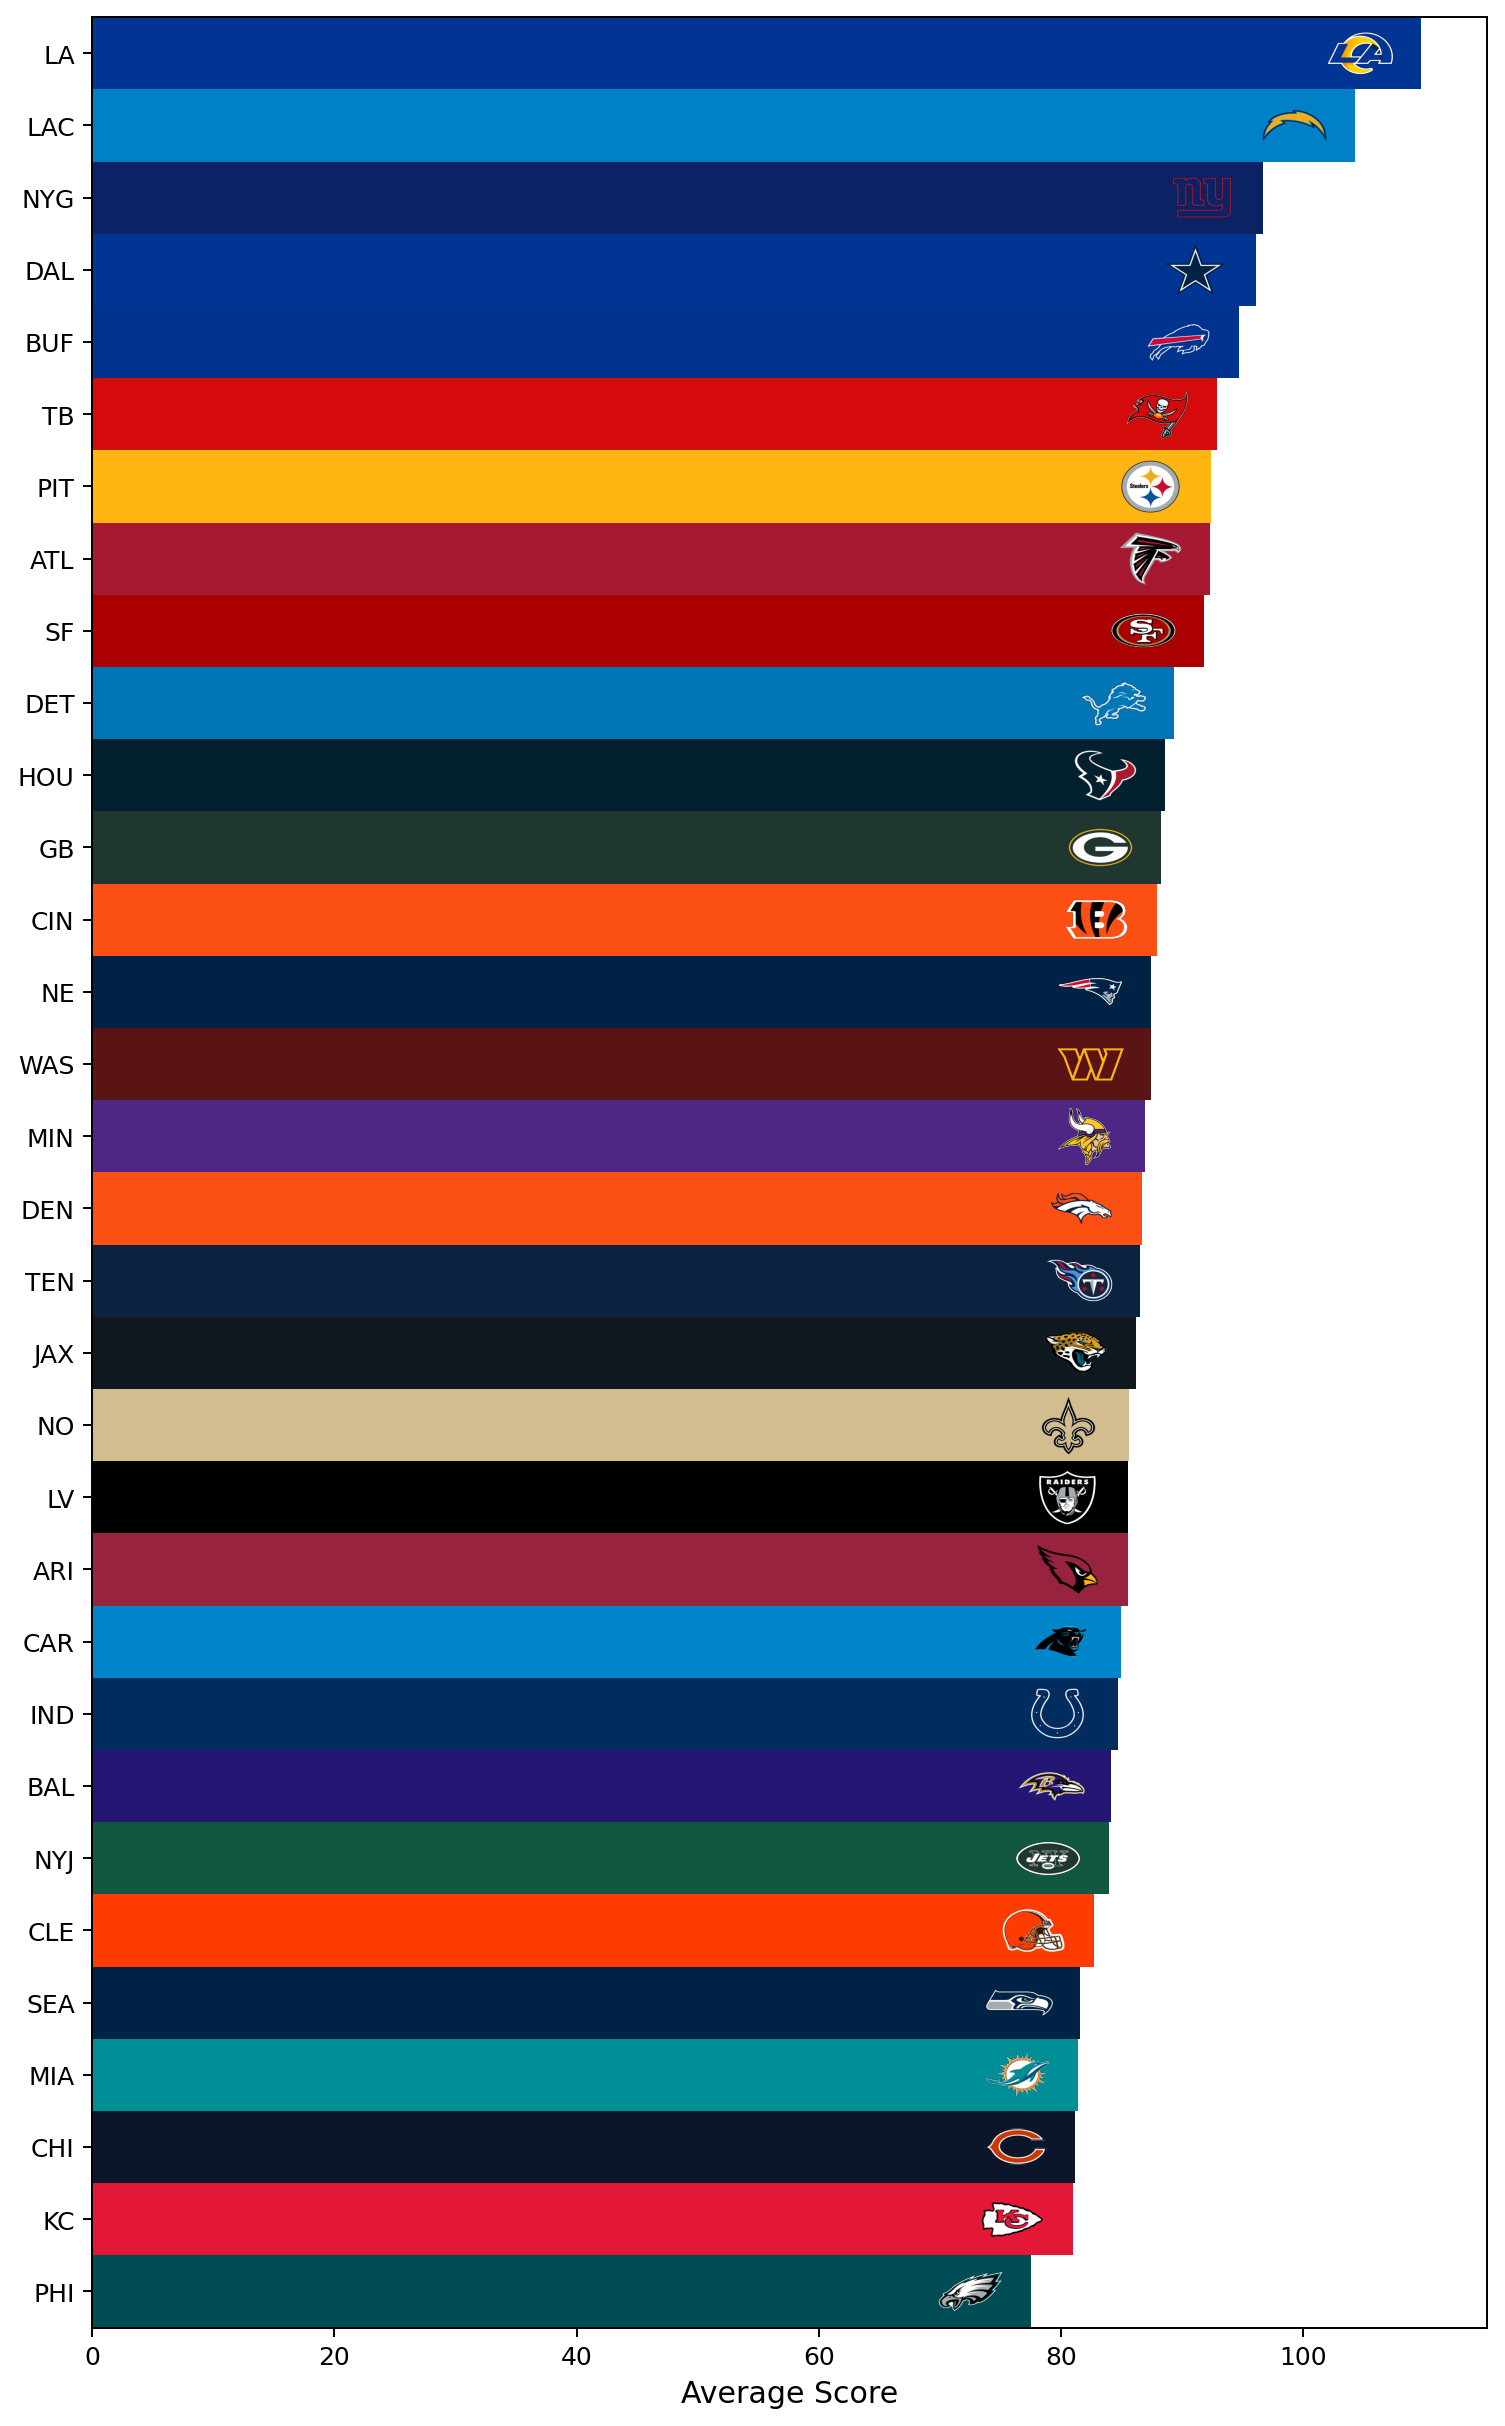

In [41]:
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.cbook as cbook
import requests
from io import BytesIO
from matplotlib.pyplot import figure
import imageio
figure(figsize=(10, 17), dpi=180)

labels = average_o_line['possessionTeam']
#color= ['gold' if l == 'PIT' 'blue' if l=='BAL' else 'green' for l in labels]

label_list = list(labels)
#.reverse()
#label_list.reverse()
colors = []
for i in label_list:
    if i =='PIT':
        colors.append('#FFB612')
    elif i =='BAL':
        colors.append('#241773')
    elif i =='LA':
        colors.append('#003594')
    elif i =='TB':
        colors.append('#D50A0A')
    elif i =='ATL':
        colors.append('#A71930')
    elif i =='CIN':
        colors.append('#FB4F14')
    elif i =='LAC':
        colors.append('#0080C6')
    elif i =='DEN':
        colors.append('#FB4F14')
    elif i =='DET':
        colors.append('#0076B6')
    elif i =='NE':
        colors.append('#002244')
    elif i =='MIN':
        colors.append('#4F2683')
    elif i =='NYG':
        colors.append('#0B2265')
    elif i =='DAL':
        colors.append('#003594')
    elif i =='GB':
        colors.append('#203731')
    elif i =='SF':
        colors.append('#AA0000')
    elif i =='TEN':
        colors.append('#0C2340')
    elif i =='LV':
        colors.append('#000000')
    elif i =='JAX':
        colors.append('#101820')
    elif i =='WAS':
        colors.append('#5A1414')
    elif i =='CAR':
        colors.append('#0085CA')
    elif i =='ARI':
        colors.append('#97233F')
    elif i =='NYJ':
        colors.append('#125740')
    elif i =='HOU':
        colors.append('#03202F')
    elif i =='SEA':
        colors.append('#002244')
    elif i =='MIA':
        colors.append('#008E97')
    elif i =='CLE':
        colors.append('#FF3C00')
    elif i =='KC':
        colors.append('#E31837')
    elif i =='BUF':
        colors.append('#00338D')
    elif i =='IND':
        colors.append('#002C5F')
    elif i =='CHI':
        colors.append('#0B162A')
    elif i =='NO':
        colors.append('#D3BC8D')
    elif i =='PHI':
        colors.append('#004C54')
        
        
values =average_o_line['score']#/max(average_o_line['score'])

height = 0.9
plt.barh(y=labels, width=values, height=1, color=colors, align='center')
#plt.bar(x=labels, width=values, height=1, color=colors, align='center')



plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel("Average Score", size = 'large')

for i, (label, value) in enumerate(zip(labels, values)):
    # load the image corresponding to label into img
    # with cbook.get_sample_data('ada.png') as image_file:
    #    img = plt.imread(image_file)
    print(label)
    image = label + '.png'
    img = imageio.imread(image)
    plt.imshow(img, extent=[value - 8, value - 2, i - height / 2, i + height / 2], aspect='auto', zorder=2)




#plt.tight_layout()
plt.savefig('ranking1.png')

In [42]:
opposite = final[['possessionTeam','score']].groupby(['possessionTeam']).mean().reset_index().sort_values('score')
opposite





,possessionTeam,score
25,PHI,77.493028
15,KC,80.992659
5,CHI,81.181822
19,MIA,81.353634
27,SEA,81.542124
7,CLE,82.714027
24,NYJ,83.926841
2,BAL,84.154756
13,IND,84.715243
4,CAR,84.903275


In [43]:
average_by_d_type = final[['possessionTeam','pff_passCoverage','score']].groupby(['possessionTeam','pff_passCoverage']).mean().reset_index().sort_values('score')
average_by_d_type

,possessionTeam,pff_passCoverage,score
287,TEN,Miscellaneous,19.000000
27,BUF,Bracket,20.000000
192,MIN,Prevent,25.000000
223,NYJ,Bracket,26.000000
45,CHI,2-Man,27.500000
...,...,...,...
113,HOU,Cover-2,159.756530
155,LA,Quarters,167.680230
159,LAC,Cover-0,167.904778
6,ARI,Prevent,237.433858


In [44]:
def label(column):
    new = []
    for i in column:
        print(i)
        if i == 'C':
            new.append('Completed')
        if i == 'IN':
            new.append('Incompleted')
        if i == 'I':
            new.append('Intercepted')
        if i == 'R':
            new.append('Scramble')
        if i == 'S':
            new.append('Sack')
    return new

average_by_d_type_no_team = final[['score','passResult']].groupby(['passResult']).mean().reset_index().sort_values('score')
average_by_d_type_no_team['score']= round(average_by_d_type_no_team['score'],1)
average_by_d_type_no_team['passResult'] = label(average_by_d_type_no_team['passResult'])
average_by_d_type_no_team

S
R
IN
I
C


,passResult,score
4,Sack,27.5
3,Scramble,28.6
2,Incompleted,84.3
1,Intercepted,92.5
0,Completed,98.4


In [45]:
import chartify

In [46]:
ch = chartify.Chart(blank_labels=True, x_axis_type='categorical')
print("j")
ch.axes.set_yaxis_label("Average Score")
ch.axes.set_xaxis_label("Play Result")
ch.plot.bar(
        data_frame=average_by_d_type_no_team,
        categorical_columns='passResult',
        numeric_column='score')

ch.plot.text(
        data_frame= average_by_d_type_no_team,
        categorical_columns='passResult',
        numeric_column='score',
        text_column = 'score')
ch.show()

j


In [47]:
average_by_d_type = final[['possessionTeam','pff_passCoverage','score']].groupby(['possessionTeam','pff_passCoverage']).mean().reset_index().sort_values('score')
average_by_d_type

,possessionTeam,pff_passCoverage,score
287,TEN,Miscellaneous,19.000000
27,BUF,Bracket,20.000000
192,MIN,Prevent,25.000000
223,NYJ,Bracket,26.000000
45,CHI,2-Man,27.500000
...,...,...,...
113,HOU,Cover-2,159.756530
155,LA,Quarters,167.680230
159,LAC,Cover-0,167.904778
6,ARI,Prevent,237.433858


In [48]:
average = average_by_d_type[['pff_passCoverage','score']].groupby('pff_passCoverage').mean().reset_index()
average['possessionTeam'] = 'League Average'
average

,pff_passCoverage,score,possessionTeam
0,2-Man,77.896510,League Average
1,Bracket,74.393911,League Average
2,Cover-0,82.552472,League Average
3,Cover-1,88.941595,League Average
4,Cover-2,88.870422,League Average
5,Cover-3,88.745545,League Average
6,Cover-6,89.927385,League Average
7,Goal Line,71.428571,League Average
8,Miscellaneous,79.909096,League Average
9,Prevent,88.205710,League Average


In [49]:
#d#ata1 = chartify.examples.example_data()
average_by_d_type_updated = average_by_d_type[average_by_d_type['pff_passCoverage']!='Miscellaneous']
average_by_d_type_updated = average_by_d_type_updated[average_by_d_type_updated['pff_passCoverage']!='Goal Line']
average_by_d_type_updated = average_by_d_type_updated[average_by_d_type_updated['pff_passCoverage']!='Bracket']
average_by_d_type_updated = average_by_d_type_updated[average_by_d_type_updated['pff_passCoverage']!='Prevent']
average_by_d_type_updated = average_by_d_type_updated.sort_values('score')
with_average = pd.concat([average,average_by_d_type_updated],axis = 0)

#f.loc[df['favorite_colorsssisin(array)]
a = ['NYG','DAL',"LAC","LA","BUF"]
b = ['DAL','LAC','DEN','KC']
#la = with_average.loc[with_average['possessionTeam'].isin(a)]
    # Plot the data
(chartify.Chart(
        blank_labels=True,
        x_axis_type='categorical',
        y_axis_type='categorical')
     .plot.heatmap(
        data_frame=average_by_d_type_updated,
        x_column='pff_passCoverage',
        y_column='possessionTeam',
        color_column='score',
        text_column='score',
        text_color='white',
         color_palette='Blues',
         reverse_color_order = False,
         color_value_range = 10000)
     .axes.set_xaxis_label('Defensive Formation')
     .axes.set_yaxis_label('Team')
     .show())


In [50]:
b = ['BUF','BAL','League Average']
c = ['Bracket','Prevent','Goal Line','Miscellaneous','2-Man']
la = with_average.loc[with_average['possessionTeam'].isin(b)]
la =la.loc[~la['pff_passCoverage'].isin(c)]
ch = chartify.Chart(blank_labels=True, x_axis_type='categorical')
ch.set_title("Grouped bar chart - Group hierarchy order")
ch.set_subtitle(
        "Change chage order of 'categorical_column' list to switch grouping hierarchy."
    )
ch.plot.bar(
        data_frame=la,
        categorical_columns= ['pff_passCoverage','possessionTeam'],
        numeric_column='score',
        
        color_column='possessionTeam')
ch.axes.set_xaxis_tick_orientation('vertical')
ch.show()


In [51]:
(chartify.Chart(
        blank_labels=True,
        x_axis_type='categorical',
        y_axis_type='categorical')
     .plot.heatmap(
        data_frame=la,
        x_column='pff_passCoverage',
        y_column='possessionTeam',
        color_column='score',
        text_column='score',
        text_color='white',
         color_palette='Blues',
         reverse_color_order = False,
         color_value_range = 10000)
     .axes.set_xaxis_label('Defensive Formation')
     .axes.set_yaxis_label('Team')
     .show())

In [52]:
with_average

,pff_passCoverage,score,possessionTeam
0,2-Man,77.896510,League Average
1,Bracket,74.393911,League Average
2,Cover-0,82.552472,League Average
3,Cover-1,88.941595,League Average
4,Cover-2,88.870422,League Average
...,...,...,...
76,Cover-1,125.810003,DAL
148,2-Man,133.341075,LA
113,Cover-2,159.756530,HOU
155,Quarters,167.680230,LA


In [53]:
average_by_d_type_man = final[['possessionTeam','pff_passCoverageType','score']].groupby(['possessionTeam','pff_passCoverageType']).mean().reset_index().sort_values('score')
average_man = final[['pff_passCoverageType','score']].groupby(['pff_passCoverageType']).mean().reset_index()
average_man['possessionTeam'] = 'League Average'
average_by_d_type_man=average_by_d_type_man[average_by_d_type_man['pff_passCoverageType']!='Other']

In [54]:
(chartify.Chart(
        blank_labels=True,
        x_axis_type='categorical',
        y_axis_type='categorical')
     .plot.heatmap(
        data_frame=average_by_d_type_man,
        x_column='pff_passCoverageType',
        y_column='possessionTeam',
        color_column='score',
        text_column='score',
        text_color='white',
         color_palette='Blues',
         reverse_color_order = False,
         color_value_range = 10000)
     .axes.set_xaxis_label('Defensive Formation')
     .axes.set_yaxis_label('Team')
     .show())

<function matplotlib.pyplot.show(close=None, block=None)>

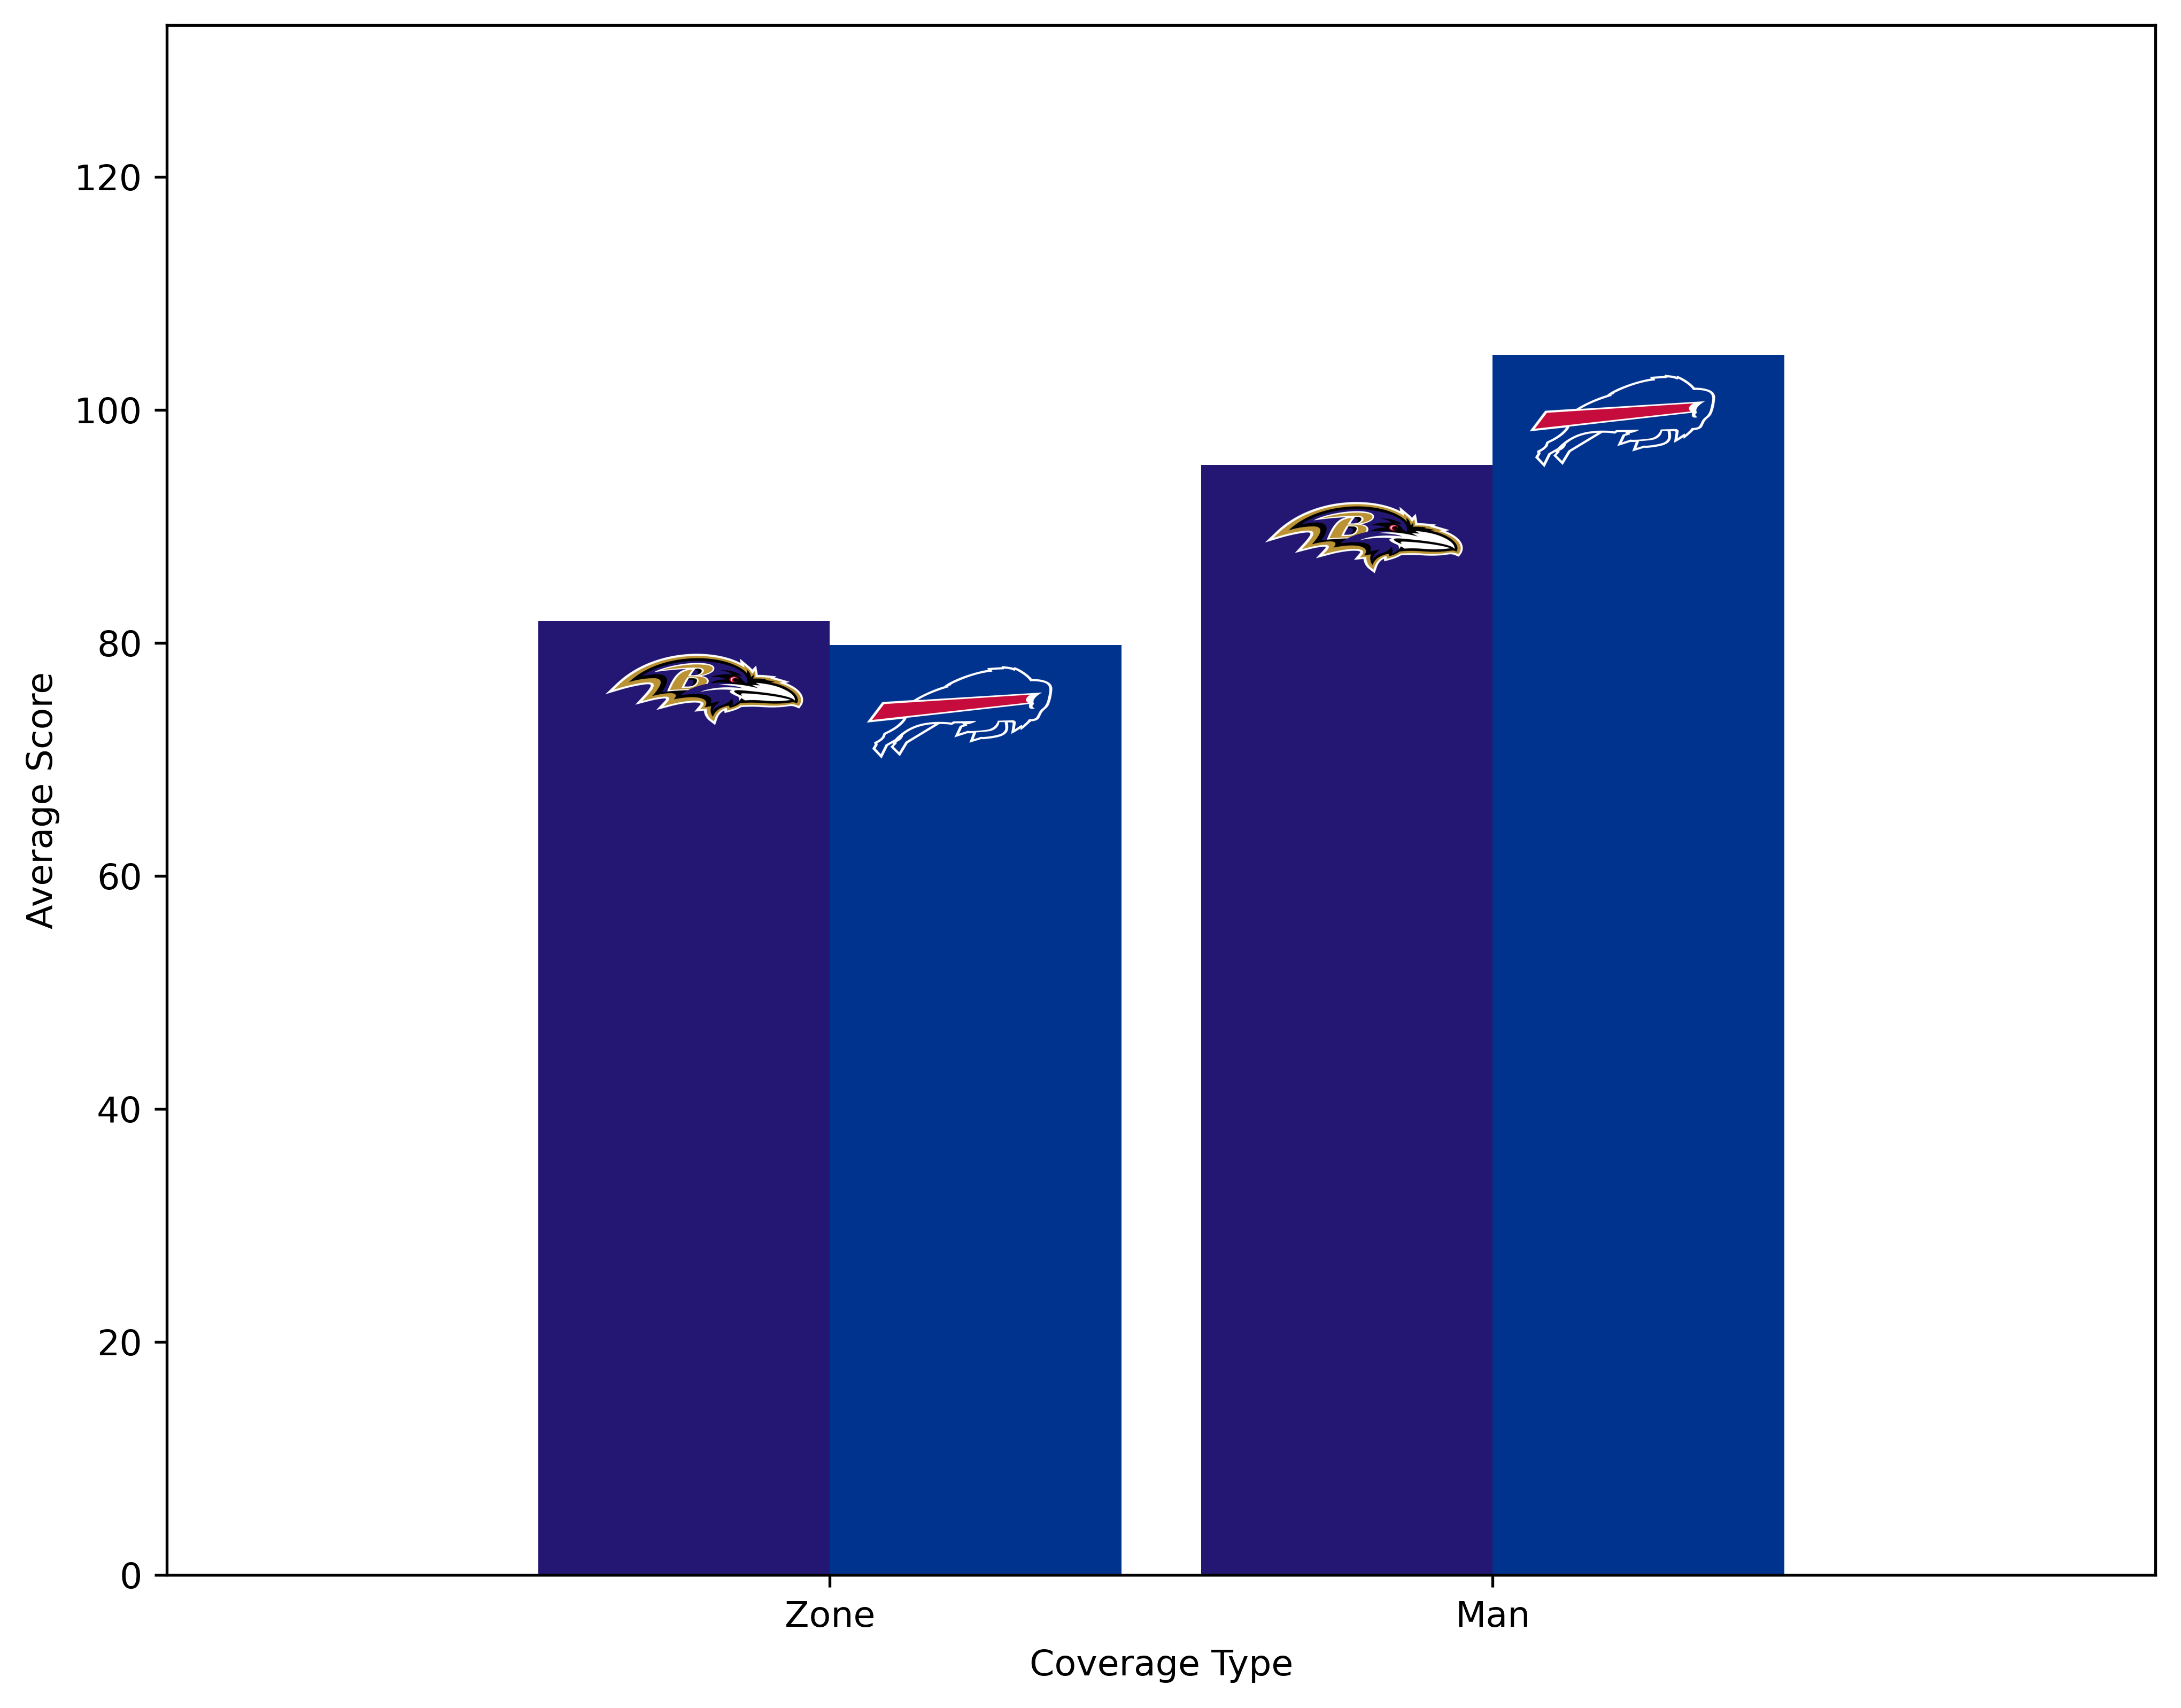

In [55]:
import numpy as np 
import matplotlib.pyplot as plt 

fig = figure(figsize=(10, 8), dpi=480)
X = ['Zone','Man']
bal = average_by_d_type_man[average_by_d_type_man['possessionTeam']=='BAL']
buf = average_by_d_type_man[average_by_d_type_man['possessionTeam']=='BUF']
buf = buf['score']
bal = bal['score']
X_axis = np.arange(len(X))
  
plt.bar(X_axis -.22 , bal, .44, label = 'BAL', color='#241773', align ='center')
plt.bar(X_axis +.22, buf, 0.44, label = 'BUF',color = '#00338D',align ='center')
plt.xticks(X_axis, X)
plt.xlabel("Coverage Type")
plt.ylabel("Average Score")

#plt.title("Number of Students in each group")
labels = ['BAL',"BUF",'BAL','BUF']
values = [buf.reset_index()['score'][0],bal.reset_index()['score'][0],buf.reset_index()['score'][1],bal.reset_index()['score'][1]]

plt.xlim(-1, 2)
plt.ylim(0, 133)

#image = label + '.png'
img = imageio.imread('BUF.png')
img1 = imageio.imread('BAL.png')
plt.imshow(img1, extent=[-.355, -.025, 69, 83], aspect='auto', zorder=2)
plt.imshow(img, extent=[0.03, .36, 67, 81], aspect='auto', zorder=2)
plt.imshow(img, extent=[1.03, 1.36, 92,106], aspect='auto', zorder=2)
plt.imshow(img1, extent=[.64, .97, 82, 96], aspect='auto', zorder=2)
plt.show
